In [20]:
import pandas as pd
import numpy as np

In [21]:
xgb_21 = pd.read_csv("https://raw.githubusercontent.com/mainadwitiya/Kaggle-song-popularity/main/submission_files/power%20avg%20cvs's/XGB_21_jan.csv?token=GHSAT0AAAAAABPK7AEB636JIHPGNFP4JEHEYP7Z5RQ")
lgbm_best = pd.read_csv("https://raw.githubusercontent.com/mainadwitiya/Kaggle-song-popularity/main/submission_files/power%20avg%20cvs's/lgbm-mmmm.csv?token=GHSAT0AAAAAABPK7AEBMZQELD7XKFMM4SNMYP72AOQ")
lgbm_2000 = pd.read_csv("https://raw.githubusercontent.com/mainadwitiya/Kaggle-song-popularity/main/submission_files/power%20avg%20cvs's/lgbm_2000_n_est.csv?token=GHSAT0AAAAAABPK7AEBRJYPNQYRGY7EVUPCYP72AXQ")
cat_b = pd.read_csv("https://raw.githubusercontent.com/mainadwitiya/Kaggle-song-popularity/main/submission_files/power%20avg%20cvs's/submission_cat%20(1).csv?token=GHSAT0AAAAAABPK7AEALZBCXDTVP2XNZO4GYP72BFQ")
lgbm_ork = pd.read_csv("https://raw.githubusercontent.com/mainadwitiya/Kaggle-song-popularity/main/submission_files/power%20avg%20cvs's/submission_lgb.csv?token=GHSAT0AAAAAABPK7AEBOIA5JOS7ESHR7TB4YP72BUA")
xgb_200 = pd.read_csv("https://raw.githubusercontent.com/mainadwitiya/Kaggle-song-popularity/main/submission_files/power%20avg%20cvs's/submission_xgb_best_params1_200_trials.csv?token=GHSAT0AAAAAABPK7AEBPKC4ATP5CURVU5NMYP72CKA")
xgb_250 = pd.read_csv("https://raw.githubusercontent.com/mainadwitiya/Kaggle-song-popularity/main/submission_files/power%20avg%20cvs's/submission_xgb_best_params1_250_trials_imputed_median.csv?token=GHSAT0AAAAAABPK7AEAMUMS6HQYRFR4NZAGYP72CXA")
xgb_god = pd.read_csv("https://raw.githubusercontent.com/mainadwitiya/Kaggle-song-popularity/main/submission_files/power%20avg%20cvs's/submission_god_xgb.csv?token=GHSAT0AAAAAABPK7AEBVVYM54G2NYKJH7IYYP72HBQ")
blend_cb = pd.read_csv("https://raw.githubusercontent.com/mainadwitiya/Kaggle-song-popularity/main/submission_files/power%20avg%20cvs's/spp-1-v1-test-spp-BLEND-CB-2-0.5767.csv?token=GHSAT0AAAAAABPK7AEBJMO2MYSO3LZJPYB6YP72HRA")
blend_nn = pd.read_csv("https://raw.githubusercontent.com/mainadwitiya/Kaggle-song-popularity/main/submission_files/power%20avg%20cvs's/spp-1-v1-test-spp-BLEND-NN-1-0.5772.csv?token=GHSAT0AAAAAABPK7AEA4RUIHAJBHQE3A26AYP72IMQ")
blend_xgb = pd.read_csv("https://raw.githubusercontent.com/mainadwitiya/Kaggle-song-popularity/main/submission_files/power%20avg%20cvs's/spp-1-v1-test-spp-BLEND-XGB-2-0.5752.csv?token=GHSAT0AAAAAABPK7AEAVU4CANNE7DHZV4F4YP72JAA")





In [22]:
list_of_subs = [xgb_21.song_popularity, lgbm_best.song_popularity, lgbm_2000.song_popularity,
                cat_b.song_popularity, lgbm_ork.song_popularity, xgb_200.song_popularity,
                xgb_250.song_popularity, xgb_god.song_popularity, blend_cb.song_popularity,
                blend_nn.song_popularity, blend_xgb.song_popularity]

group_labels = ['xgb_21', 'lgbm_best', 'lgbm_2000','cat_b',
                'lgbm_ork', 'xgb_200', 'xgb_250', 'xgb_god','blend_cb',
                'blend_nn', 'blend_xgb']

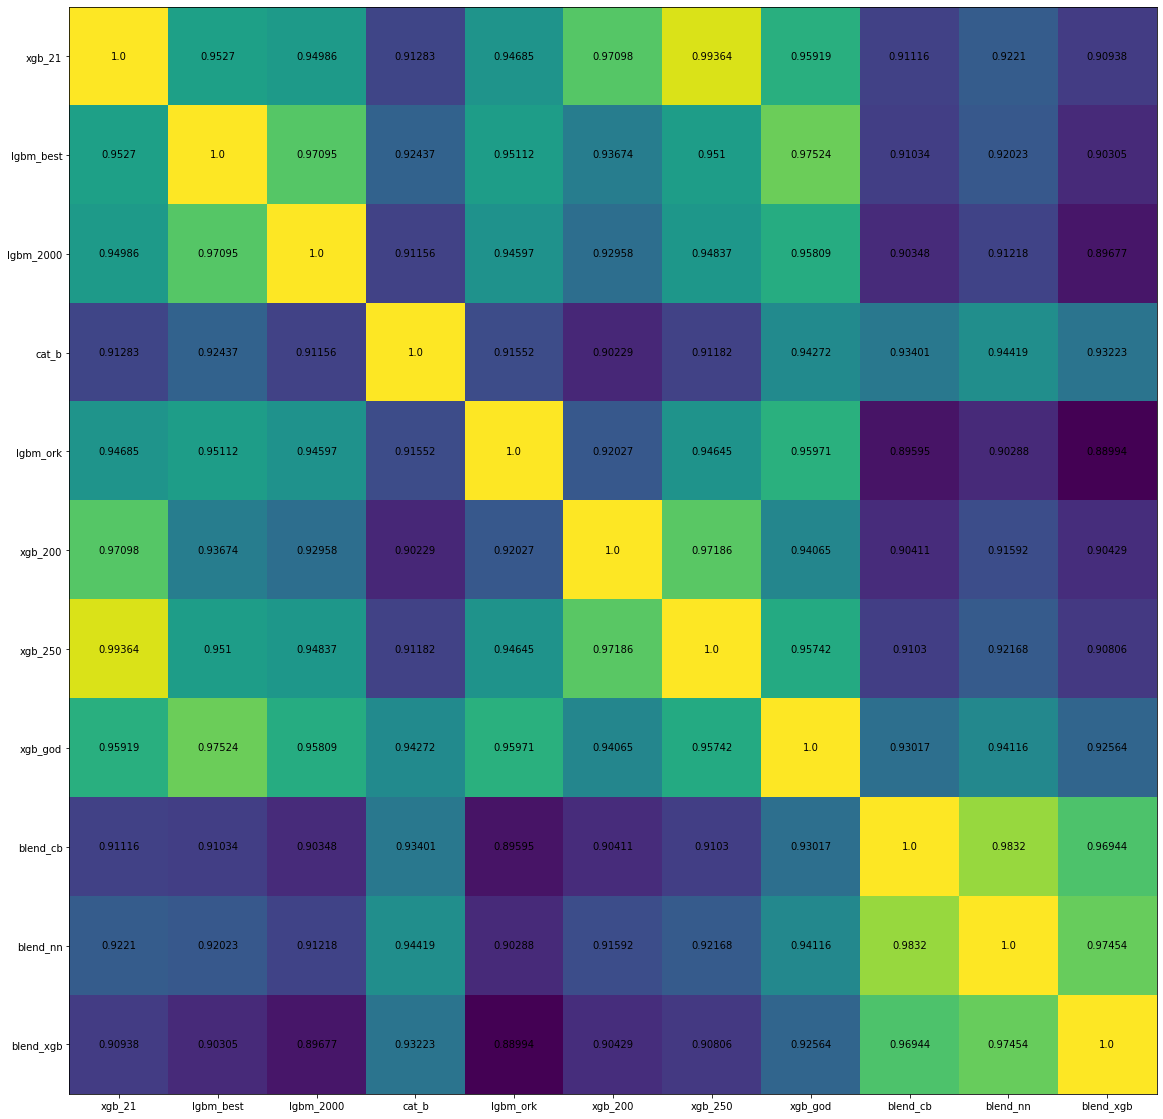

In [23]:
## correlations for best model

import seaborn as sns
import matplotlib.pyplot as plt

data = np.corrcoef(list_of_subs)

fig, ax = plt.subplots(figsize=(20,20))
im = ax.imshow(data)

ax.set_xticks(np.arange(len(group_labels)))
ax.set_yticks(np.arange(len(group_labels)))

ax.set_xticklabels(group_labels)
ax.set_yticklabels(group_labels)

for i in range(len(group_labels)):
    for j in range(len(group_labels)):
        text = ax.text(j, i, data[i, j].round(5),
                       ha="center", va="center")

In [32]:
group_labels

['xgb_21',
 'lgbm_best',
 'lgbm_2000',
 'cat_b',
 'lgbm_ork',
 'xgb_200',
 'xgb_250',
 'xgb_god',
 'blend_cb',
 'blend_nn',
 'blend_xgb']

In [44]:
# 1- 5 - 4 - 6 - 2 - 11 - 8 - 3 - 7 - 9 - 10 - 15 - 12 -13 - 16 - 14 
submission = pd.read_csv('https://raw.githubusercontent.com/mainadwitiya/Kaggle-song-popularity/main/csv/sample_submission.csv?token=GHSAT0AAAAAABPK7AEBRCWHNXSG34VUOTD6YP2254Q')
ensemble = submission.copy()
power = 64
ensemble.loc[:,'song_popularity'] = ((xgb_21 ** power + lgbm_best ** power 
                                      + xgb_250 ** power + xgb_god ** power
                                      + lgbm_2000 ** power + cat_b ** power
                                      + lgbm_ork ** power +  xgb_200 ** power ) / 8
                                     + (blend_cb ** power + blend_nn ** power 
                                        + blend_xgb ** power) / 3
                                     ) / 2
 
 




 

In [45]:
ensemble.to_csv('submission_power_avg_64.csv', index= False)

In [43]:
ensemble

,id,song_popularity
0,0,6.844271e-07
1,1,4.126574e-06
2,2,5.097034e-09
3,3,1.706492e-08
4,4,1.229222e-07
...,...,...
9995,9995,4.279794e-08
9996,9996,6.095408e-09
9997,9997,6.081576e-08
9998,9998,2.080157e-06
